# Logistic Regression

**Importing the Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Importing the Data**

In [2]:
data = pd.read_csv("hearing_test.csv")
data

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


**Describing the Data with some Statical Methods**

In [3]:
data.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [4]:
data["test_result"].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

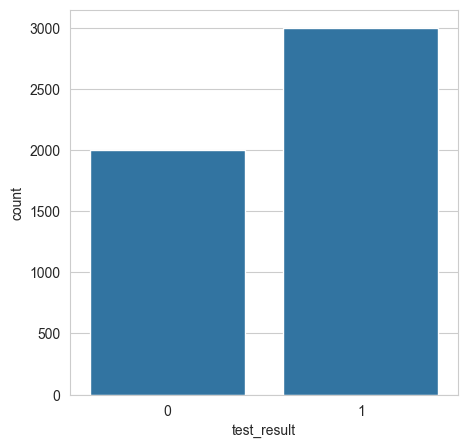

In [5]:
plt.figure(figsize=(5, 5), dpi=100)
sns.countplot(data, x="test_result");

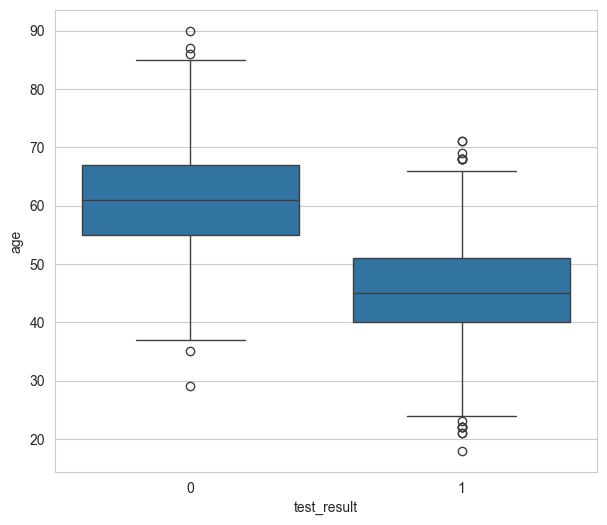

In [6]:
plt.figure(figsize=(7, 6), dpi=100)
sns.boxplot(x="test_result", y="age", data=data);

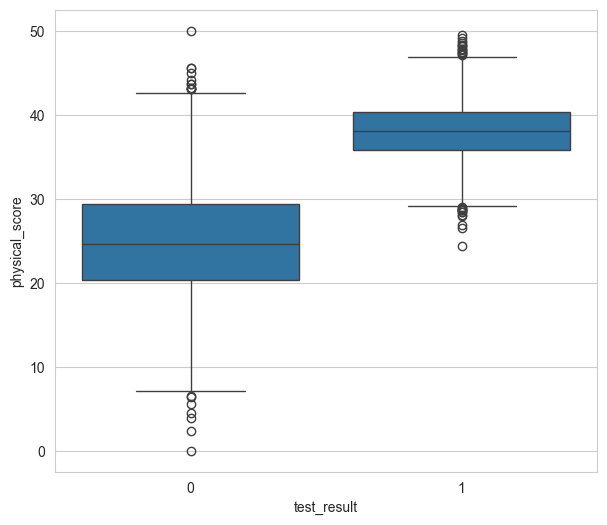

In [7]:
plt.figure(figsize=(7, 6), dpi=100)
sns.boxplot(x="test_result", y="physical_score", data=data);

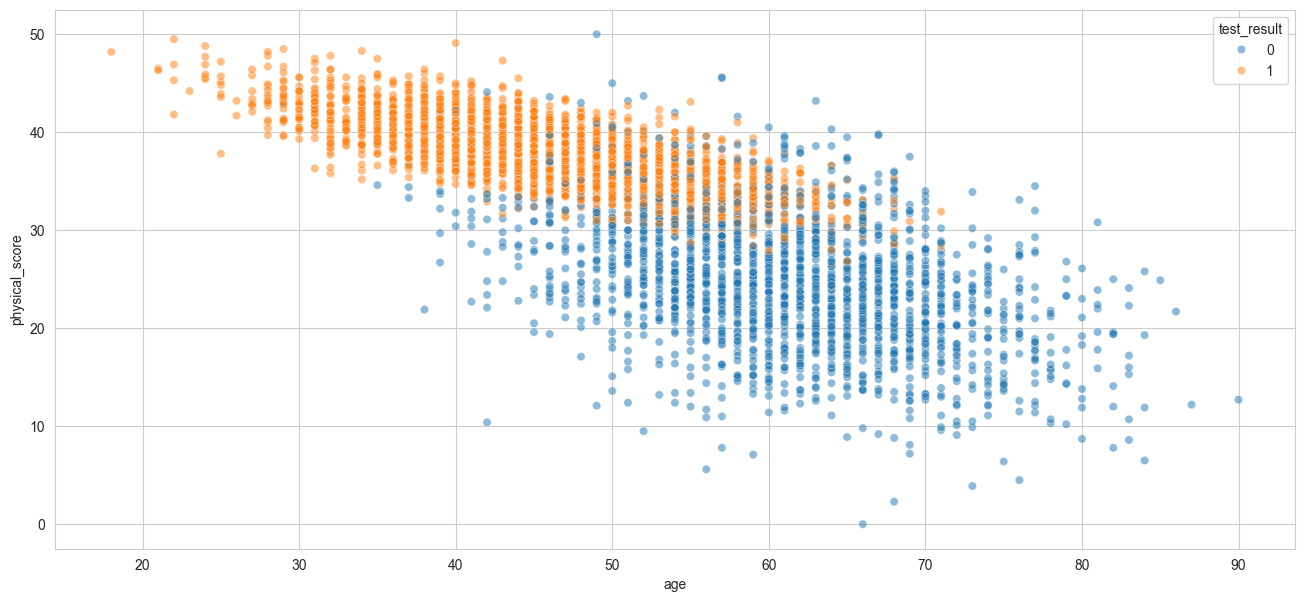

In [8]:
plt.figure(figsize=(16, 7), dpi=100)
sns.scatterplot(data=data, x="age", y="physical_score", hue="test_result", alpha=0.5);

<Figure size 640x480 with 0 Axes>

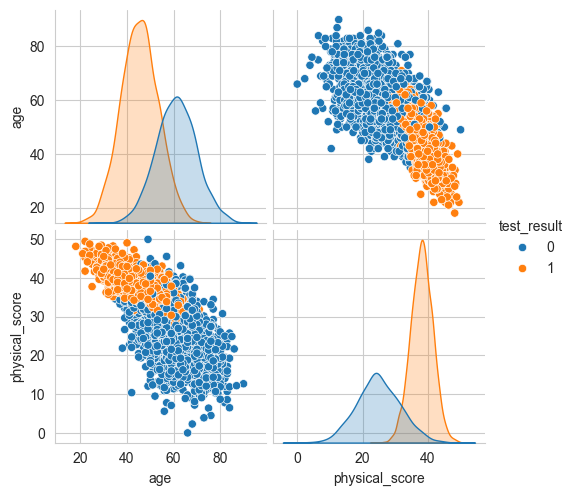

In [9]:
plt.figure(dpi=100)
sns.pairplot(data=data, hue="test_result");

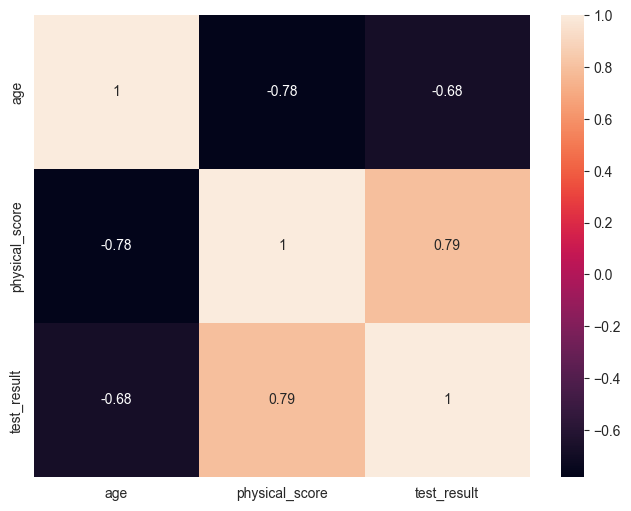

In [10]:
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(data.corr(), annot=True);

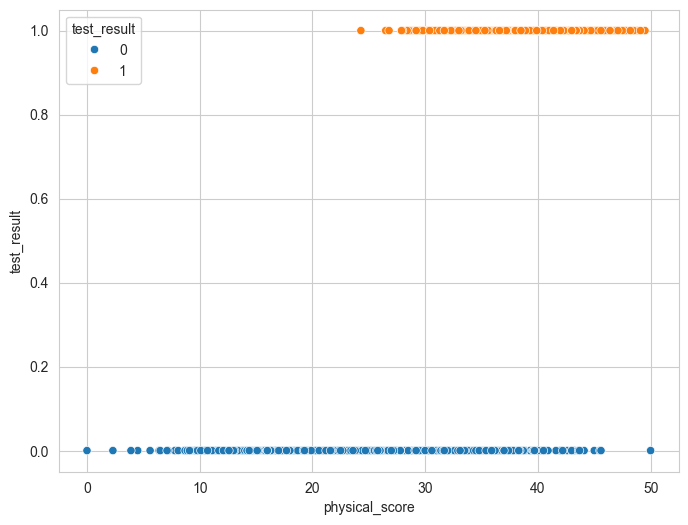

In [11]:
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=data, x="physical_score", y="test_result", hue="test_result");

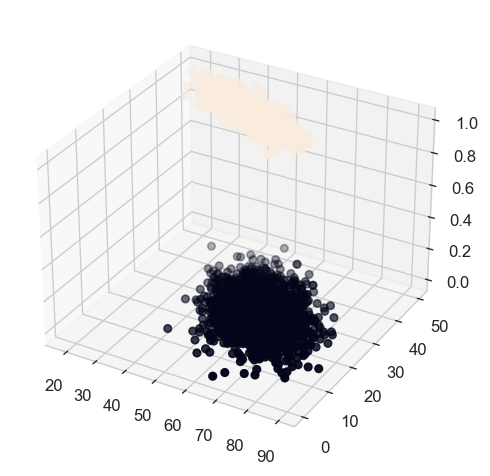

In [12]:
fig = plt.figure(dpi=120)
axis = fig.add_subplot(111, projection='3d')
axis.scatter(data["age"], data["physical_score"], data["test_result"], c=data["test_result"]);

**Splitting the Independent and Dependent Feature**

In [13]:
x = data.drop(columns="test_result")
y = data["test_result"]

**Splitting the Data into the Training and Testing Data**

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

**Scaling the Dependent Training and Testing Data**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Implementing the Logistic Regression**

In [16]:
from sklearn.linear_model import LogisticRegression
classifier_model = LogisticRegression()
classifier_model.fit(x_train, y_train)
y_pred = classifier_model.predict(x_test)

**Coefficient of Model**

In [17]:
classifier_model.coef_

array([[-0.88366896,  3.49606344]])

**Evaluating the Accuracy Score, Confusion Matrix and Classification Matrix**

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy Score -", accuracy_score(y_test, y_pred))
print("Confusion Matrix -\n\n", confusion_matrix(y_test, y_pred, normalize='true'))
print("\nClassification Report -\n\n", classification_report(y_test, y_pred))

Accuracy Score - 0.92
Confusion Matrix -

 [[0.87160494 0.12839506]
 [0.04705882 0.95294118]]

Classification Report -

               precision    recall  f1-score   support

           0       0.93      0.87      0.90       405
           1       0.92      0.95      0.93       595

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.92      0.92      0.92      1000


**Plotting the ROC Curve** 

<Figure size 800x700 with 0 Axes>

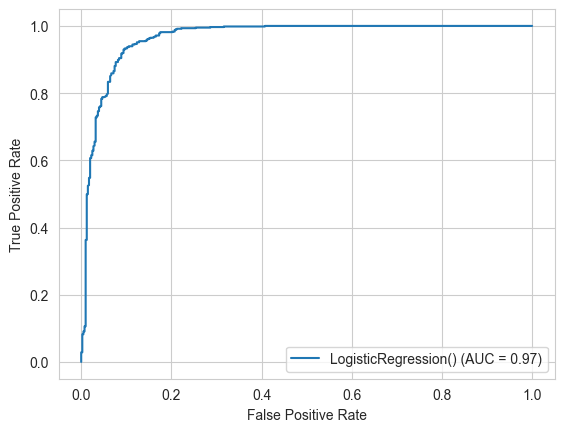

In [19]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
probabs = classifier_model.predict_proba(x_test)
probabs = probabs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabs)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=classifier_model)
plt.figure(figsize=(8, 7), dpi=100)
display.plot();

**Plotting the Precision Recall Curve**

<Figure size 640x480 with 0 Axes>

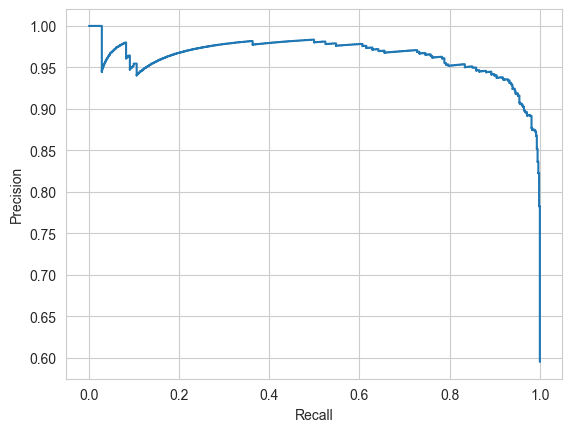

In [20]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
plt.figure(dpi=100)
precision, recall, _ = precision_recall_curve(y_test, probabs)
display = PrecisionRecallDisplay(precision, recall)
display.plot();